In [2]:
# 矢量运算
from mxnet import nd
from time import time

a = nd.ones(shape = 1000)
b = nd.ones(shape = 1000)

start = time()
d = a+b
# time() - start

In [3]:
#线性回归实验
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd,nd
import random


In [5]:
#生成待拟合函数
num_inputs = 2
num_examples = 1000
true_w = [2,-3,4]
true_b = 4.2
features = nd.random.normal(scale=1,shape=(num_examples,num_inputs))
labels = true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels +=nd.random.normal(scale=0.01,shape = labels.shape)


In [6]:
features[0],labels[0]

(
 [-0.15963984  1.7974477 ]
 <NDArray 2 @cpu(0)>, 
 [-1.4969807]
 <NDArray 1 @cpu(0)>)

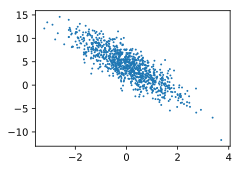

In [7]:
def use_svg_display():
    display.set_matplotlib_formats('svg')    #图片显示
def set_figsize(figsize = (3.5,2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize   #图片大小

set_figsize()
plt.scatter(features[:,1].asnumpy(),labels.asnumpy(),1);

In [8]:
#小批量读取样本
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)    #随机读取样本
    for i in range(0,num_examples,batch_size):
        j = nd.array(indices[i:min(i+batch_size,num_examples)])
        yield features.take(j),labels.take(j)   #take函数根据索引返回对应元素
        
        

In [9]:
batch_size = 10
for X,y in data_iter(batch_size,features,labels):
    print(X,y)
    break


[[ 0.07628381  1.0538037 ]
 [ 0.5949216  -1.258278  ]
 [-0.63341045  0.6966015 ]
 [-0.5987124   0.31140596]
 [-0.48583525  1.9226174 ]
 [-0.8897515  -0.04410378]
 [ 1.0215318  -0.65557027]
 [ 1.558138   -1.1273855 ]
 [ 1.1291928   1.6150981 ]
 [-0.19567324 -0.6603138 ]]
<NDArray 10x2 @cpu(0)> 
[ 1.1776818  9.160548   0.8388264  2.070319  -2.5349715  2.5436623
  8.200098  10.712032   1.61191    5.800533 ]
<NDArray 10 @cpu(0)>


In [24]:
#参数初始化
w = nd.random.normal(scale = 0.01,shape = (num_inputs,1))
b = nd.zeros(shape=(1,))


In [25]:
w.attach_grad()
b.attach_grad()

In [26]:
def linreg(X,w,b):     #线性回归，矩阵乘法
    return nd.dot(X,w)+b

In [27]:
#损失函数
def squared_loss(y_hat,y):
    return(y_hat-y.reshape(y_hat.shape)) ** 2 / 2 

In [28]:
#优化算法   随机梯度下降算法  lr：学习率
def sgd(params,lr,batch_size):    
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [31]:
'''
在每次迭代中，我们根据当前读取的小批量数据样本（特征X和标签y），
通过调⽤反向函数backward计算小批量随机梯度，并调⽤优化算法sgd迭代模型参数。
'''
lr = 0.01
num_epochs = 7
net = linreg
loss = squared_loss

for epoch in range(num_epochs):# 训练模型⼀共需要num_epochs个迭代周期
# 在每⼀个迭代周期中，会使⽤训练数据集中所有样本⼀次（假设样本数能够被批量⼤⼩整除）。
# X和y分别是⼩批量样本的特征和标签
    for X,y in data_iter(batch_size,features,labels):
        with autograd.record():
            l = loss(net(X,w,b),y)   #损失计算
        l.backward()     #损失对模型参数求梯度
        sgd([w,b],lr,batch_size)   #小批量随机梯度下降迭代模型参数
    train_l = loss(net(features,w,b),labels)
    print('epoch %d,loss %f' % (epoch+1,train_l.mean().asnumpy()))
    

epoch 1,loss 0.000066
epoch 2,loss 0.000054
epoch 3,loss 0.000052
epoch 4,loss 0.000051
epoch 5,loss 0.000051
epoch 6,loss 0.000051
epoch 7,loss 0.000051


In [30]:
print(true_w,w)
print(true_b,b)

[2, -3, 4] 
[[ 1.9971373]
 [-2.990687 ]]
<NDArray 2x1 @cpu(0)>
4.2 
[4.188928]
<NDArray 1 @cpu(0)>


In [32]:
#线性回归简洁实现
#使用和上面相同的数据集

In [33]:
from mxnet.gluon import data as gdata

batch_size = 10
#数据集定义
dataset = gdata.ArrayDataset(features,labels)

data_iter = gdata.DataLoader(dataset,batch_size,shuffle=True)

In [35]:
for X , y in data_iter:
    print(X,y)
    break


[[ 0.23114508  0.44114697]
 [ 0.97594106  0.06474928]
 [ 0.8631022  -0.30451903]
 [ 0.11217412 -0.27965716]
 [ 0.09886705 -0.3514098 ]
 [-2.0254319  -0.20634381]
 [-0.4114147  -0.2113528 ]
 [ 0.5974047  -0.45210093]
 [-0.06366119  0.96332896]
 [-0.6680753   1.3376648 ]]
<NDArray 10x2 @cpu(0)> 
[ 3.3452432   5.9758673   6.849693    5.2657704   5.4542394   0.77628124
  4.011721    6.753457    1.16628    -1.1565753 ]
<NDArray 10 @cpu(0)>

[[-1.6407245  -0.5270526 ]
 [-0.18903568 -0.27302608]
 [ 1.1726002   0.66429913]
 [ 0.5629847  -2.2018304 ]
 [ 1.1646266  -1.4321374 ]
 [ 0.6674861  -0.02206962]
 [ 0.7093973   0.02881484]
 [-0.40943798  0.30418384]
 [-2.768254    0.3481491 ]
 [-2.3191311   0.5174    ]]
<NDArray 10x2 @cpu(0)> 
[ 2.49892    4.64636    4.55096   11.938439  10.80782    5.6047816
  5.5306306  2.4574971 -2.386515  -2.0089343]
<NDArray 10 @cpu(0)>

[[ 2.1564064   1.0938221 ]
 [-0.6216917  -0.546191  ]
 [ 1.4200556   0.05695248]
 [ 1.558138   -1.1273855 ]
 [-0.09337829  0.9888

In [37]:
from mxnet.gluon import nn
#使用预留网络
net = nn.Sequential()

net.add(nn.Dense(1))   #输出为1的网络层

from mxnet import init
#参数初始化
net.initialize(init.Normal(sigma = 0.01))

from mxnet.gluon import loss as gloss
#定义损失函数 
loss = gloss.L2Loss()     #L2范数损失
from mxnet import gluon
#定义优化算法   sgd(随机梯度下降)
trainer = gluon.Trainer(net.collect_params(),'sgd',{'learning_rate':0.01})

num_epochs = 3
for epoch in range(1,epoch+1):
    for X,y in data_iter:
        with autograd.record():
            l = loss(net(X),y)
        l.backward()
        trainer.step(batch_size)
    l = loss(net(features),labels)
    print('epoch %d,loss %f' % (epoch,l.mean().asnumpy()))
    

epoch 1,loss 2.051617
epoch 2,loss 0.279934
epoch 3,loss 0.038395
epoch 4,loss 0.005330
epoch 5,loss 0.000786
epoch 6,loss 0.000152


In [39]:
dense = net[0]    #读取net第一层参数
print(true_w,dense.weight.data())
print(true_b,dense.bias.data())

[2, -3, 4] 
[[ 1.9970613 -2.9908357]]
<NDArray 1x2 @cpu(0)>
4.2 
[4.1889668]
<NDArray 1 @cpu(0)>
